<img src='img/logo.png'>
<img src='img/title.png'>

# Supervised Learning

<img src='img/supervised_workflow.svg' width=60%>

# Table of Contents
* [Supervised Learning](#Supervised-Learning)
	* [Setup](#Setup)
	* [Definitions](#Definitions)
* [Predict home prices](#Predict-home-prices)
	* [Train and Test](#Train-and-Test)
	* [Fitting](#Fitting)
	* [Predicting](#Predicting)
	* [Scoring](#Scoring)
* [Exercises](#Exercises)
	* [Predict hourly bike rentals](#Predict-hourly-bike-rentals)
* [Regression and classification](#Regression-and-classification)
* [Complexity vs Generalization](#Complexity-vs-Generalization)
	* [Exercise](#Exercise)
* [Missing Data](#Missing-Data)
* [Regression and Classification Models](#Regression-and-Classification-Models)
* [Features](#Features)


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()
%matplotlib inline

[mglearn](https://github.com/amueller/introduction_to_ml_with_python) is a special package written by Andreas Müller to accompany the book _Introduction to Machine Learning with Python_.

In [2]:
import src.mglearn as mglearn

## Definitions

<big><big><big>
<tt>X</tt>: the matrix of observations
<br><br>
<tt>y</tt>: the set of outcomes (discrete labels or continuous values)
</big></big></big>

<img src='img/data_representation.svg' width=90% align='left'>

# Predict home prices

Model and predict median home prices in the Boston area.

The training data consists of attributes from 506 *tracts*.

>The "Census Tract" is an area roughly equivalent to a neighborhood established by the Bureau of Census for analyzing populations. They generally encompass a population between 2,500 to 8,000 people.

In [3]:
from sklearn import datasets

boston = datasets.load_boston()

print(boston['DESCR'][:1397])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [ ]:
houses = pd.DataFrame(data=boston.data, columns=boston.feature_names)
houses['price'] = boston.target
houses.head()

Does the number of rooms influence price?
--------------------------------------

In [ ]:
houses[['RM','price']].corr()

In [ ]:
houses.plot.scatter(x='RM', y='price')

## Train and Test

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
Reserve a portion of the dataset to <i>evaluate</i> the model
</font></div>

<img src='img/train_test_split_matrix.svg'>

Determine the full X and y datasets

In [ ]:
X = houses.drop('price', axis='columns')
y = houses['price']

In [ ]:
X.shape

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size=+2>
reserve 25% of the rows for <tt>X_test</tt> and <tt>y_test</tt>
</font></div>

By default a random sample is taken. `random_state=0` means we'll get the same split every time and is good practice while developing your model.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

## Fitting

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
All <b>models</b> implement a <tt>.fit()</tt> method to train the model
</font></div>

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

We'll use Pandas to select the *features* (columns) to fit the model.

When using Pandas it's preferable to pass DataFrames instead of Series objects.

In [ ]:
lr.fit(X_train[['RM']], y_train)

## Predicting

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
Use <tt>.predict()</tt> to generate outcomes on new observations
</font></div>

In [ ]:
lr.predict(X_test[['RM']])

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.fit(X_train, y_train)

In [ ]:
lr2.predict(X_test)

In [ ]:
lr2.score(X_test, y_test)

## Scoring

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>

How accurate is the prediction over data that was *not* used in training?
</font></div>

For linear regression models the *score* is the $R^2$ value called the coefficient of determination.

In [ ]:
lr.score(X_test[['RM']], y_test)

This is not a great score. There are many points far from the linear regression line.

In [ ]:
ax = houses.plot.scatter(x='RM', y='price')
ax.plot(houses['RM'], lr.predict(houses[['RM']]), 'r-')

# Exercises

<img src='img/topics/Exercise.png' align='left'>
<div class='alert alert-success' align='center'><font size='+2'>
Practice <tt>LinearRegression</tt> fitting and scoring
</font></div>

## Predict hourly bike rentals

This dataset is hourly bike rentals in the citybike platform.

The `'cnt'` column is the number of rentals, which we want to predict from date and weather data. The weather data have been normalized for convenience.

The bike data come from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [ ]:
bikes = pd.read_csv('data/bike_day_raw.csv')
bikes.head()

1. Split the data into a training and a test set using ``train_test_split``.
1. Make a new ``LinearRegression`` model and fit over the training set
1. Evaluate the model with `.score()` over the testing set
1. Try fitting and scoring with different sets of features
    * You may plot or perform statistical tests to find reasonable features.

In [ ]:
X = bikes.drop(['cnt','workingday'], axis='columns')
y = bikes['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr3 = LinearRegression()

In [ ]:
lr3.fit(X_train, y_train)

In [ ]:
lr3.predict(X_test)

In [ ]:
lr3.score(X_test, y_test)

.418

<button data-toggle="collapse" data-target="#code1" class='btn btn-primary'>Show solution</button>

<div id="code1" class="collapse">

```python
X_train, X_test, y_train, y_test = train_test_split(X, y)

bikes_lr = LinearRegression()
bikes_lr.fit(X_train, y_train)

bikes_lr.score(X_test,y_test)
```

In [ ]:
bikes.corr()

More simple models might just use tempe or atemp

# Regression and classification

Predicting the price or a home, the mpg rating of a car or the number of bike rides per day is called **regression**.

Classification predicts a discrete *label* for an observation.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'][:471])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


In [8]:
X = iris.data[:, 2:4]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

<img src='img/topics/Essential-Concept.png' align='left'>
<div class='alert alert-info' align='center'><font size='+2'>
KNeighbors predicts a label by consensus of training data in the local region.
</font></div>

Notice that there is some overlap between the versicolor and virginica regions.

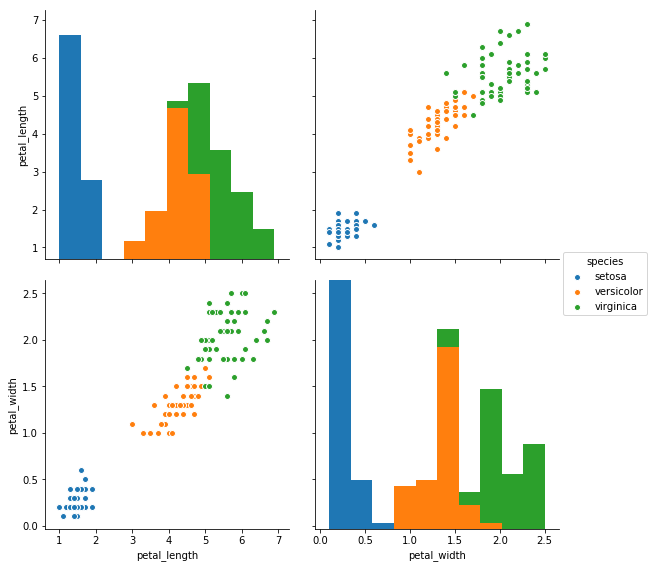

In [9]:
flowers = pd.read_csv('data/iris.csv')
sns.pairplot(flowers, vars=['petal_length','petal_width'], hue='species', size=4)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=10)

We'll just train on petal width and petal length for now.

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [13]:
knn.score(X_test, y_test)

0.9473684210526315

In [15]:
knn.score?

In [14]:
knn.predict(X_test)

array([1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2])

By evaluating a grid of points in the space of the two features we can plot the *decision boundaries* between each label.

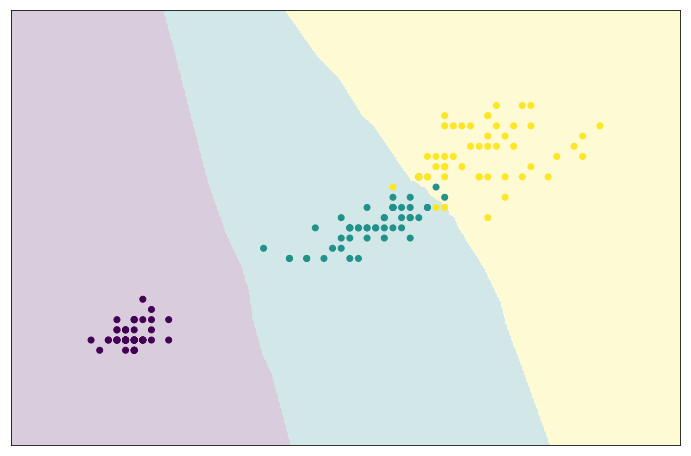

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(knn, X, alpha=0.2, ax=ax)

# Complexity vs Generalization

The `LinearRegression` model is the simplest regression model:
* It is not very complex: It cannot fit complicated relationships
* *When* it can accurately model the data it is very general

*It is hard to overfit a `LinearRegression`.

The `KNeighbors` model:
* *less general* for small values of `n_neighbors`
* large values of `n_neighbors` will end up predicting only the most commonly occurring label

In [17]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

By looking for consensus with only the nearest point, `KNeighbors` has almost *memorized* the training data.

In [19]:
knn1.score(X_test, y_test)

0.9736842105263158

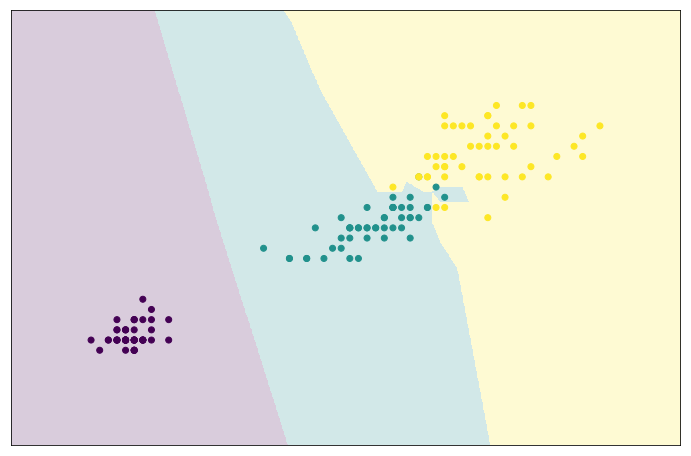

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.reset_orig()
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(knn1, X, alpha=0.2, ax=ax)

An overly complex model may *overfit* the data. this reduces the *generality* of the model and leads to loss of predictive value

## Exercise

<img src='img/topics/Exercise.png' align='left'>
<div class='alert alert-success' align='center'><font size='+2'>
Try to determine a good value for <tt>n_neighbors</tt>
</font></div>

Notice that the `sepal_width` and `sepal_length` features provide a less distinct separation between versicolor and virginica.

In [ ]:
flowers = pd.read_csv('data/iris.csv')
sns.pairplot(flowers, vars=['sepal_length','sepal_width'], hue='species', size=4)

In [ ]:
X = iris.data[:, 1:3]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Fit and score a `KNeighbors` model with a different value of `n_neighbors` to determine an optimal tradeoff between complexity and generality.

In [ ]:
# your solution here

<button data-toggle="collapse" data-target="#code2" class='btn btn-primary'>Show solution</button>

<div id="code2" class="collapse">

```python
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12,8))
sns.reset_orig()
ax.scatter(X[:, 0], X[:, 1], c=y)
mglearn.plot_2d_separator.plot_2d_classification(knn, X, alpha=0.2, ax=ax)
```

# Missing Data

Scikit-learn methods cannot handle missing data.

You must either drop observations with missing data or *impute* values in order to fit a model.

# Regression and Classification Models

<a href='linear_models.ipynb' class='btn btn-primary btn-lg'>
    Linear Models</a><br/><br/>
<a href='naive_bayes.ipynb' class='btn btn-primary btn-lg'>
    Naive Bayes Classifiers</a><br/><br/>
<a href='decision_trees.ipynb' class='btn btn-primary btn-lg'>
    Trees and Ensembles</a><br/><br/>
<a href='svm_models.ipynb' class='btn btn-primary btn-lg'>
    Support Vector Machines</a>

# Features

<!--<a href='feature_selection.ipynb' class='btn btn-primary btn-lg'>Selecting features</a>-->

<div class="row">
    <a href='Scaling_and_Normalization.ipynb' class='btn btn-primary btn-lg' style="float:left">Scaling and Normalization</a>
    <div class="row" style="float:right">
        <a href='Scaling_and_Normalization_Exercises.ipynb' class='btn btn-primary btn-lg' style="float:left">Exercises</a>
    </div>
</div><br/>
<div class="row">
    <a href='Feature_Preprocessing_Feature_Selection.ipynb' class='btn btn-primary btn-lg' style="float:left">Feature Preprocessing and Feature Selection</a>
    <div class="row" style="float:right">
        <a href='Feature_Preprocessing_Feature_Selection_Exercises.ipynb' class='btn btn-primary btn-lg' style="float:left">Exercises</a>
    </div>
</div>

<img src='img/copyright.png'>